In [1]:
# Import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import datetime


In [2]:
# Read in data for fuel tank levels
fuel_tank_levels_df = pd.read_csv('data/Extranet2.ExactFuelTankLevels.csv', index_col='ExactFuelEventId')

/Users/elancas/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
# Quick check of fuel levels
fuel_tank_levels_df.sort_index().head(20)

,Id,TankId,TankLevelPercent,TankLevelGallons
ExactFuelEventId,,,,
12649083,10375449,1,50.7,101.40
12649084,10375450,1,78.0,156.00
12649092,10375458,1,31.7,63.40
12649102,10375468,1,43.2,108.00
12649103,10375469,1,50.3,125.75
12649104,10375470,1,81.7,163.40
12649105,10375471,1,37.4,74.80
12649106,10375472,1,62.5,125.00
12649107,10375473,1,52.0,104.00


In [4]:
# Read in data for fuel events
fuel_events_df = pd.read_csv('data/Extranet2.ExactFuelEvents.csv', index_col='ESS_Id')

/Users/elancas/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [54]:
# Quick look at fuel events
fuel_events_df[fuel_events_df.DriverID == 'ANDANT']

,Id,EventTimeStamp,EquipmentID,MCTNumber,EquipmentType,DriverID,Latitude,Longitude,LocationTimeStamp,Speed,Heading,Odometer,IgnitionStatus,EFReportReason
ESS_Id,,,,,,,,,,,,,,
14235715,13209469,2017-01-31 16:01:01.890,1541,105392962,tractor,ANDANT,36.06725,-86.43342,2017-01-31 16:01:04.000,0,178.2,544540.6,1,1
14235758,13209480,2017-01-31 16:03:01.890,1541,105392962,tractor,ANDANT,36.06726,-86.43340,2017-01-31 16:03:04.000,0,178.2,544540.6,1,0
14236074,13209498,2017-01-31 16:18:01.937,1541,105392962,tractor,ANDANT,36.15418,-86.36163,2017-01-31 16:18:04.000,66,21.6,544547.9,1,2
14236383,13209512,2017-01-31 16:33:02.047,1541,105392962,tractor,ANDANT,36.20718,-86.29122,2017-01-31 16:33:04.000,12,6.8,544558.9,1,2
14236706,13209530,2017-01-31 16:48:02.123,1541,105392962,tractor,ANDANT,36.35265,-86.25513,2017-01-31 16:48:04.000,56,7.0,544568.8,1,2
14237005,13210578,2017-01-31 17:03:02.247,1541,105392962,tractor,ANDANT,36.53411,-86.24597,2017-01-31 17:03:04.000,63,29.1,544582.0,1,2
14237313,13210598,2017-01-31 17:18:02.310,1541,105392962,tractor,ANDANT,36.70935,-86.24727,2017-01-31 17:18:04.000,62,35.6,544594.3,1,2
14237576,13210613,2017-01-31 17:33:02.437,1541,105392962,tractor,ANDANT,36.75691,-86.17102,2017-01-31 17:33:05.000,0,311.6,544602.3,1,2
14237678,13210619,2017-01-31 17:37:42.420,1541,105392962,tractor,ANDANT,36.75691,-86.17102,2017-01-31 17:37:45.000,0,311.6,544602.3,2,1


In [ ]:
print('# of fuel events:\t\t', fuel_events_df.shape[0])
print('# of fuel level readings:\t', fuel_tank_levels_df.shape[0])

In [ ]:
fuel_events_df[fuel_events_df['EFReportReason'] == 2]

In [55]:
# Merge fuel events and tank levels
merged_events_levels_df = pd.merge(fuel_events_df, fuel_tank_levels_df)
#print('# of row in merged dataframe:\t', merged_events_levels_df.shape[0])

In [57]:
merged_events_levels_df[merged_events_levels_df['DriverID'] == 'ANDANT'].sort_values('LocationTimeStamp')

,Id,EventTimeStamp,EquipmentID,MCTNumber,EquipmentType,DriverID,Latitude,Longitude,LocationTimeStamp,Speed,Heading,Odometer,IgnitionStatus,EFReportReason,TankId,TankLevelPercent,TankLevelGallons
560056,13209469,2017-01-31 16:01:01.890,1541,105392962,tractor,ANDANT,36.06725,-86.43342,2017-01-31 16:01:04.000,0,178.2,544540.6,1,1,1,57.9,115.80
560067,13209480,2017-01-31 16:03:01.890,1541,105392962,tractor,ANDANT,36.06726,-86.43340,2017-01-31 16:03:04.000,0,178.2,544540.6,1,0,1,36.4,83.72
560085,13209498,2017-01-31 16:18:01.937,1541,105392962,tractor,ANDANT,36.15418,-86.36163,2017-01-31 16:18:04.000,66,21.6,544547.9,1,2,1,70.2,140.40
560099,13209512,2017-01-31 16:33:02.047,1541,105392962,tractor,ANDANT,36.20718,-86.29122,2017-01-31 16:33:04.000,12,6.8,544558.9,1,2,1,48.8,97.60
560117,13209530,2017-01-31 16:48:02.123,1541,105392962,tractor,ANDANT,36.35265,-86.25513,2017-01-31 16:48:04.000,56,7.0,544568.8,1,2,1,73.0,146.00
561165,13210578,2017-01-31 17:03:02.247,1541,105392962,tractor,ANDANT,36.53411,-86.24597,2017-01-31 17:03:04.000,63,29.1,544582.0,1,2,1,47.1,94.20
561185,13210598,2017-01-31 17:18:02.310,1541,105392962,tractor,ANDANT,36.70935,-86.24727,2017-01-31 17:18:04.000,62,35.6,544594.3,1,2,1,64.9,129.80
561200,13210613,2017-01-31 17:33:02.437,1541,105392962,tractor,ANDANT,36.75691,-86.17102,2017-01-31 17:33:05.000,0,311.6,544602.3,1,2,1,81.4,162.80
561206,13210619,2017-01-31 17:37:42.420,1541,105392962,tractor,ANDANT,36.75691,-86.17102,2017-01-31 17:37:45.000,0,311.6,544602.3,2,1,1,38.2,76.40
561211,13210624,2017-01-31 17:42:12.420,1541,105392962,tractor,ANDANT,36.75689,-86.17091,2017-01-31 17:42:15.000,4,77.2,544602.3,1,1,1,57.8,115.60


In [58]:
# Drop unneeded columns
merged_events_levels_df.drop(['Id', 'EquipmentType'], axis=1, inplace=True)

In [59]:
# Change IgnitionStatus from Off = 2 to Off = 0 to maintain my sanity
merged_events_levels_df['IgnitionStatus'].replace([2],[0], inplace=True)
merged_events_levels_df

,EventTimeStamp,EquipmentID,MCTNumber,DriverID,Latitude,Longitude,LocationTimeStamp,Speed,Heading,Odometer,IgnitionStatus,EFReportReason,TankId,TankLevelPercent,TankLevelGallons
0,2017-01-01 00:00:32.387,1992,105369677,BATK,30.34642,-81.70724,2017-01-01 00:00:30.000,0,0.0,39895.5,0,1,1,54.4,108.80
1,2017-01-01 00:01:24.867,1712,105437938,TAYANT,36.93953,-84.09541,2017-01-01 00:01:27.000,0,0.0,360378.8,1,2,1,51.2,102.40
2,2017-01-01 00:04:15.053,1713,105438293,RUSR,35.58664,-84.52786,2017-01-01 00:04:17.000,67,219.5,377577.4,1,2,1,79.8,159.60
3,2017-01-01 00:04:10.260,1585,105301976,MCAD,35.15430,-90.14263,2017-01-01 00:04:10.000,0,0.0,513931.8,1,2,1,60.0,120.00
4,2017-01-01 00:10:13.187,1564,105351785,ULAL,39.90268,-84.19254,2017-01-01 00:10:11.000,3,91.0,498691.0,1,2,1,67.7,135.40
5,2017-01-01 00:11:08.123,1711,105321298,FOSJA,30.51558,-81.63283,2017-01-01 00:11:10.000,3,127.6,342948.0,1,2,1,31.1,77.75
6,2017-01-01 00:11:48.803,1693,105356123,THOCHA,36.18582,-86.26805,2017-01-01 00:11:50.000,0,333.2,340043.7,1,2,1,54.5,109.00
7,2017-01-01 00:12:26.077,1787,105455670,RODMAR,35.16910,-80.88830,2017-01-01 00:12:27.000,53,193.1,224306.6,1,2,1,65.6,150.88
8,2017-01-01 00:13:02.450,1992,105369677,BATK,30.34646,-81.70727,2017-01-01 00:13:00.000,0,0.0,39895.5,1,0,1,100.0,200.00
9,2017-01-01 00:13:38.137,1711,105321298,FOSJA,30.51642,-81.63271,2017-01-01 00:13:40.000,0,96.3,342948.1,0,1,1,54.4,136.00


In [60]:
# Change EFReportReason codes from On = 0 and Off = 1 to On = 1 and Off = 0 to maintain my sanity
merged_events_levels_df['EFReportReason'].replace([0,1],[1,0], inplace=True)
merged_events_levels_df

,EventTimeStamp,EquipmentID,MCTNumber,DriverID,Latitude,Longitude,LocationTimeStamp,Speed,Heading,Odometer,IgnitionStatus,EFReportReason,TankId,TankLevelPercent,TankLevelGallons
0,2017-01-01 00:00:32.387,1992,105369677,BATK,30.34642,-81.70724,2017-01-01 00:00:30.000,0,0.0,39895.5,0,0,1,54.4,108.80
1,2017-01-01 00:01:24.867,1712,105437938,TAYANT,36.93953,-84.09541,2017-01-01 00:01:27.000,0,0.0,360378.8,1,2,1,51.2,102.40
2,2017-01-01 00:04:15.053,1713,105438293,RUSR,35.58664,-84.52786,2017-01-01 00:04:17.000,67,219.5,377577.4,1,2,1,79.8,159.60
3,2017-01-01 00:04:10.260,1585,105301976,MCAD,35.15430,-90.14263,2017-01-01 00:04:10.000,0,0.0,513931.8,1,2,1,60.0,120.00
4,2017-01-01 00:10:13.187,1564,105351785,ULAL,39.90268,-84.19254,2017-01-01 00:10:11.000,3,91.0,498691.0,1,2,1,67.7,135.40
5,2017-01-01 00:11:08.123,1711,105321298,FOSJA,30.51558,-81.63283,2017-01-01 00:11:10.000,3,127.6,342948.0,1,2,1,31.1,77.75
6,2017-01-01 00:11:48.803,1693,105356123,THOCHA,36.18582,-86.26805,2017-01-01 00:11:50.000,0,333.2,340043.7,1,2,1,54.5,109.00
7,2017-01-01 00:12:26.077,1787,105455670,RODMAR,35.16910,-80.88830,2017-01-01 00:12:27.000,53,193.1,224306.6,1,2,1,65.6,150.88
8,2017-01-01 00:13:02.450,1992,105369677,BATK,30.34646,-81.70727,2017-01-01 00:13:00.000,0,0.0,39895.5,1,1,1,100.0,200.00
9,2017-01-01 00:13:38.137,1711,105321298,FOSJA,30.51642,-81.63271,2017-01-01 00:13:40.000,0,96.3,342948.1,0,0,1,54.4,136.00


In [61]:
merged_events_levels_df.dtypes

EventTimeStamp        object
EquipmentID            int64
MCTNumber              int64
DriverID              object
Latitude             float64
Longitude            float64
LocationTimeStamp     object
Speed                  int64
Heading              float64
Odometer             float64
IgnitionStatus         int64
EFReportReason         int64
TankId                 int64
TankLevelPercent     float64
TankLevelGallons     float64
dtype: object

#### Features to drop:
* MCTNumber
* LocationTimeStamp
* Speed
* Heading
* TankId

In [62]:
merged_events_levels_df.drop(['MCTNumber', 'LocationTimeStamp', 'Heading', 'TankId'], axis=1, inplace=True)

In [64]:
merged_events_levels_df['EventTimeStamp'] = pd.to_datetime(merged_events_levels_df['EventTimeStamp'])


In [66]:
merged_events_levels_df[merged_events_levels_df['DriverID'] == 'ANDANT'].sort_values('EventTimeStamp')

,EventTimeStamp,EquipmentID,DriverID,Latitude,Longitude,Speed,Odometer,IgnitionStatus,EFReportReason,TankLevelPercent,TankLevelGallons
560056,2017-01-31 16:01:01.890,1541,ANDANT,36.06725,-86.43342,0,544540.6,1,0,57.9,115.80
560067,2017-01-31 16:03:01.890,1541,ANDANT,36.06726,-86.43340,0,544540.6,1,1,36.4,83.72
560085,2017-01-31 16:18:01.937,1541,ANDANT,36.15418,-86.36163,66,544547.9,1,2,70.2,140.40
560099,2017-01-31 16:33:02.047,1541,ANDANT,36.20718,-86.29122,12,544558.9,1,2,48.8,97.60
560117,2017-01-31 16:48:02.123,1541,ANDANT,36.35265,-86.25513,56,544568.8,1,2,73.0,146.00
561165,2017-01-31 17:03:02.247,1541,ANDANT,36.53411,-86.24597,63,544582.0,1,2,47.1,94.20
561185,2017-01-31 17:18:02.310,1541,ANDANT,36.70935,-86.24727,62,544594.3,1,2,64.9,129.80
561200,2017-01-31 17:33:02.437,1541,ANDANT,36.75691,-86.17102,0,544602.3,1,2,81.4,162.80
561206,2017-01-31 17:37:42.420,1541,ANDANT,36.75691,-86.17102,0,544602.3,0,0,38.2,76.40
561211,2017-01-31 17:42:12.420,1541,ANDANT,36.75689,-86.17091,4,544602.3,1,0,57.8,115.60


In [ ]:
# Check out a particular driver's history
RUSR_df = merged_events_levels_df[merged_events_levels_df.DriverID == 'RUSR'].sort_values(by=['EventTimeStamp'])
RUSR_df

In [ ]:
# Why does the gauge flucuate so much?

In [ ]:
small_timeframe_df = RUSR_df[(RUSR_df['EventTimeStamp'] >= '2017-01-03') & (RUSR_df['EventTimeStamp'] <= '2017-01-10') & (RUSR_df['IgnitionStatus'] == 1) & (RUSR_df['EFReportReason'] == 1)]
small_timeframe_df

In [ ]:
max(small_timeframe_df.Odometer) - min(small_timeframe_df.Odometer)

In [ ]:
plt.figure(figsize=[15,6])
_ = plt.plot(small_timeframe_df.EventTimeStamp, small_timeframe_df.TankLevelPercent)
_ = plt.xlabel('TimeStamp')
_ = plt.ylabel('Fuel Level %')

plt.show();

GROSS

In [37]:
weekly_perf_df = pd.read_csv('data/Extranet2.QCPerformanceExtracts.csv', 
                             parse_dates=['DataEndTimeStamp'])
# weekly_perf_df.DataEndTimeStamp




In [38]:
# Let's look at the weekly performance.
weekly_perf_df = pd.read_csv('data/Extranet2.QCPerformanceExtracts.csv',
                            usecols=['EventTimeStamp', 'DataStartTimeStamp', 'DataEndTimeStamp', 'ESS_Id', 'EquipmentID', 'DriverID', 'Latitude', 'Longitude', 'TripStatus', 'Distance', 'DriveTime', 'EngineTime', 'MoveTime', 'IntertripIdleTime', 'ShortIdleTime', 'TotalFuelUsed', 'IdleFuelUsed', 'SpeedMatrix'],
                            dtype={'ESS_Id': np.int64,
                                  'EquipmentID': np.int64,
                                  #'EventTimeStamp': datetime,
                                  'DriverID': str,
                                  'Latitude': float,
                                  'Longitude': float,
                                  'TripStatus': str,
                                  'Distance': float,
                                  'DriveTime': float, 
                                  'EngineTime': float,
                                  'MoveTime': float, 
                                  'IntertripIdleTime': float, 
                                  'ShortIdleTime': float,
                                  'TotalFuelUsed': float, 
                                  'IdleFuelUsed': float, 
                                  'SpeedMatrix': object})

In [39]:
weekly_perf_df.sort_values('DataEndTimeStamp')

,ESS_Id,EventTimeStamp,EquipmentID,DriverID,Latitude,Longitude,TripStatus,DataStartTimeStamp,DataEndTimeStamp,Distance,DriveTime,EngineTime,MoveTime,IntertripIdleTime,ShortIdleTime,TotalFuelUsed,IdleFuelUsed,SpeedMatrix
28012,31624209,2017-11-08 21:47:37.000,1825,GANJ,35.157268,-90.139166,O,2011-01-01 02:01:00.000,2011-01-01 02:02:00.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
4347,14641410,2017-02-21 02:44:15.000,1849,GLOJE,36.195601,-83.175231,O,2011-01-01 02:19:00.000,2011-01-01 02:58:00.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"312,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
1871,13947961,2017-01-17 08:41:52.000,1525,EDMJ,35.491898,-86.433287,O,2011-01-01 17:53:00.000,2011-01-01 20:38:00.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
1870,13947960,2017-01-17 08:41:51.000,1525,EDMJ,35.491898,-86.433287,O,2011-01-01 17:53:00.000,2011-01-01 20:38:00.000,39.0,78.0,87.0,58.0,0.0,0.0,6.8,0.5,"63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
660,13776817,2017-01-08 16:15:41.000,1597,WHIGR,38.348796,-85.709490,O,2015-08-26 18:22:00.000,2015-09-04 08:38:00.000,2297.0,2719.0,2794.0,2576.0,12.0,12.0,357.0,6.0,"19,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
7400,15219487,2017-03-21 13:44:48.000,1554,JOYGE,36.067314,-86.433657,O,2015-12-22 14:29:00.000,2016-04-29 10:24:00.000,46055.0,52097.0,55760.0,49908.0,3102.0,1047.0,7221.8,143.8,"1629,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
4329,14555692,2017-02-16 10:17:53.000,1526,ANDANT,38.349305,-85.708888,O,2016-02-12 14:01:00.000,2016-05-19 08:10:00.000,26314.0,31821.0,32791.0,30521.0,666.0,133.0,3472.8,28.7,"992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
1297,13862721,2017-01-12 11:48:31.000,1597,STRAND,36.067268,-86.433333,O,2016-01-31 14:34:00.000,2016-10-14 18:55:00.000,65535.0,43429.0,45721.0,38400.0,1195.0,1094.0,14109.2,197.7,"6686,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
6798,15091157,2017-03-15 06:04:57.000,1526,HALMI,38.348564,-85.709305,O,2016-10-23 07:25:00.000,2016-10-23 07:31:00.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
8050,15369420,2017-03-28 20:42:22.000,2039,NaN,35.587222,-86.443657,O,2016-10-23 07:42:00.000,2016-10-23 07:42:00.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."


In [40]:
weekly_perf_df[weekly_perf_df.DriverID == 'ANDANT']

,ESS_Id,EventTimeStamp,EquipmentID,DriverID,Latitude,Longitude,TripStatus,DataStartTimeStamp,DataEndTimeStamp,Distance,DriveTime,EngineTime,MoveTime,IntertripIdleTime,ShortIdleTime,TotalFuelUsed,IdleFuelUsed,SpeedMatrix
3230,14356864,2017-02-07 04:13:56.000,1628,ANDANT,39.064074,-84.253055,O,2017-01-31 11:53:00.000,2017-02-04 07:25:00.000,1.0,20.0,107.0,16.0,74.0,7.0,7.3,7.1,"696,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
3231,14356865,2017-02-07 04:13:56.000,1628,ANDANT,39.064074,-84.253055,O,2017-01-31 04:13:00.000,2017-01-31 11:53:00.000,26.0,44.0,56.0,36.0,0.0,0.0,5.0,0.3,"13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
3232,14356866,2017-02-07 04:13:57.000,1628,ANDANT,39.064074,-84.253055,O,2017-02-04 07:24:00.000,2017-02-07 04:13:00.000,1229.0,1356.0,1362.0,1318.0,0.0,0.0,183.2,0.5,"50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
3796,14499112,2017-02-14 04:15:30.000,1628,ANDANT,28.015231,-82.048055,O,2017-02-07 04:13:00.000,2017-02-14 04:15:00.000,1813.0,2040.0,2054.0,1983.0,0.0,0.0,276.7,0.6,"42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
4329,14555692,2017-02-16 10:17:53.000,1526,ANDANT,38.349305,-85.708888,O,2016-02-12 14:01:00.000,2016-05-19 08:10:00.000,26314.0,31821.0,32791.0,30521.0,666.0,133.0,3472.8,28.7,"992,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,..."
4433,14642117,2017-02-21 04:07:22.000,1628,ANDANT,40.764953,-87.124629,O,2017-02-14 04:15:00.000,2017-02-21 04:07:00.000,1363.0,1534.0,1551.0,1471.0,0.0,0.0,199.1,0.6,"27,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
5015,14784053,2017-02-28 04:20:30.000,1628,ANDANT,37.045046,-86.210601,O,2017-02-21 04:07:00.000,2017-02-28 04:20:00.000,2533.0,2911.0,2941.0,2805.0,0.0,0.0,382.0,1.3,"97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
5644,14923151,2017-03-07 04:17:28.000,1628,ANDANT,34.484814,-92.727962,O,2017-02-28 04:20:00.000,2017-03-07 04:17:00.000,2926.0,3207.0,3227.0,3114.0,0.0,0.0,444.0,1.6,"36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
6704,15067704,2017-03-14 04:44:18.000,1628,ANDANT,38.239398,-86.362731,O,2017-03-07 04:17:00.000,2017-03-14 04:44:00.000,2445.0,2710.0,2727.0,2625.0,0.0,0.0,359.7,1.7,"36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."
6864,15206543,2017-03-21 04:11:02.000,1628,ANDANT,39.899166,-82.020370,O,2017-03-14 04:44:00.000,2017-03-21 04:11:00.000,3066.0,3322.0,3353.0,3197.0,11.0,11.0,457.1,2.1,"28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0..."


In [41]:
#datetime.datetime.strptime(weekly_perf_df['EventTimeStamp'], "%Y-%mm-%dd")
weekly_perf_df['DataEndTimeStamp'] = pd.to_datetime(weekly_perf_df['DataEndTimeStamp'])
weekly_perf_df['DataStartTimeStamp'] = pd.to_datetime(weekly_perf_df['DataStartTimeStamp'])

In [42]:
weekly_perf_df['Month'] = [x.month for x in weekly_perf_df.DataEndTimeStamp]
weekly_perf_df['Week'] = [x.week for x in weekly_perf_df.DataEndTimeStamp]

In [43]:
weekly_perf_df = weekly_perf_df[(weekly_perf_df.Distance > 100) & (weekly_perf_df.Distance <= 4000)]
weekly_perf_df = weekly_perf_df[weekly_perf_df['DataEndTimeStamp'] >= '2017-01-02']
weekly_perf_df.sort_values('DataEndTimeStamp')

,ESS_Id,EventTimeStamp,EquipmentID,DriverID,Latitude,Longitude,TripStatus,DataStartTimeStamp,DataEndTimeStamp,Distance,DriveTime,EngineTime,MoveTime,IntertripIdleTime,ShortIdleTime,TotalFuelUsed,IdleFuelUsed,SpeedMatrix,Month,Week
12,13645857,2017-01-02 00:13:49.000,1973,BENRO,36.066111,-86.434351,O,2016-12-20 04:06:00,2017-01-02 00:13:00,1343.0,1614.0,1740.0,1527.0,105.0,45.0,172.2,2.3,"22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",1,1
502,13661224,2017-01-03 05:23:01.000,306,HALRAY,36.066620,-86.434999,O,2016-12-27 04:41:00,2017-01-02 05:15:00,349.0,934.0,1219.0,670.0,226.0,62.0,52.7,5.3,"64,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",1,1
14,13648298,2017-01-02 08:14:44.000,1763,SHEMI,38.349027,-85.709305,O,2016-12-20 07:35:00,2017-01-02 08:14:00,1082.0,1203.0,1247.0,1143.0,31.0,0.0,149.2,1.2,"4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",1,1
15,13648515,2017-01-02 08:27:13.000,1882,BRAO,44.141574,-87.866805,O,2016-12-20 04:22:00,2017-01-02 08:27:00,1352.0,1511.0,1530.0,1462.0,5.0,5.0,202.5,1.0,"25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",1,1
510,13661232,2017-01-03 05:20:39.000,1775,QUAK,36.066342,-86.434953,O,2016-12-27 06:48:00,2017-01-02 08:52:00,1808.0,2176.0,2207.0,2054.0,0.0,0.0,259.6,1.0,"35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",1,1
18,13648928,2017-01-02 08:56:06.000,2006,HODJE,39.348935,-88.424861,I,2016-12-30 16:00:00,2017-01-02 08:56:00,351.0,364.0,377.0,352.0,0.0,0.0,49.5,0.3,"2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",1,1
20,13649600,2017-01-02 09:36:09.000,1876,HANSE,36.097037,-86.421111,I,2016-12-20 04:24:00,2017-01-02 09:36:00,1876.0,2061.0,2074.0,2008.0,0.0,0.0,246.1,0.8,"12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",1,1
457,13660927,2017-01-03 04:59:20.000,1959,ALLMA,36.066342,-86.434305,O,2016-12-27 04:23:00,2017-01-02 09:38:00,2946.0,3253.0,3318.0,3125.0,12.0,12.0,366.5,2.8,"21,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",1,1
23,13650028,2017-01-02 10:06:23.000,1901,STARI,35.496388,-86.461527,I,2016-12-20 04:13:00,2017-01-02 10:06:00,1230.0,1443.0,1455.0,1379.0,0.0,0.0,170.1,1.3,"16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",1,1
24,13650953,2017-01-02 11:01:54.000,1979,HIEK,36.066342,-86.434351,O,2016-12-20 04:06:00,2017-01-02 11:01:00,1289.0,1643.0,1690.0,1525.0,13.0,13.0,179.5,3.2,"88,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",1,1


In [44]:
gal_used_by_week_by_driver = weekly_perf_df.groupby(['DriverID', 'Week'])['TotalFuelUsed'].sum().to_frame()
#gal_used_by_mon_by_driver.reset_index(inplace=True)
gal_used_by_week_by_driver

TotalFuelUsed
DriverID  Week               
000000000 24            258.5
          25            369.0
          26            422.7
          27            393.2
          28            376.7
          29            400.8
          30            404.7
          31            268.3
          32            396.8
          33            345.0
          34            298.5
          35            343.7
          36            416.1
          37            423.0
          38            261.0
          39            368.3
          40            303.5
          41            311.6
          42            318.8
000001045 18            371.8
000001559 37            268.8
000002033 28            159.8
ABBV      14            435.3
          15            321.7
          16            499.3
          17            388.6
          18            370.6
          19            264.0
          20            418.7
          21            336.1
...                       ...
YOUJE     43            187.1
YOUW01    1             407.8
          2             368.3
          3             252.2
          4             449.5
          5             308.0
          6             514.8
          7             417.5
          8             317.6
          9             422.6
          10            342.8
          11            460.6
          12            354.6
          13            406.7
          14            364.6
          15            448.1
          16            470.3
          17            311.2
ZAMJ      10            440.8
          11            378.0
          12            226.0
          13            370.3
          14            501.0
          15            227.7
          16            442.6
          17            380.0
          18            182.5
          19            396.8
          20            367.2
          22            169.1

[23601 rows x 1 columns]

In [45]:
#weekly_perf_df.groupby(['DriverID']).TotalFuelUsed.mean()

In [46]:
#weekly_perf_df['MPG -- All'] = weekly_perf_df['Distance']/weekly_perf_df['TotalFuelUsed']

In [47]:
#weekly_perf_df['MPG -- All'].mean()

In [48]:
#weekly_perf_df.sort_values('DataEndTimeStamp')

In [49]:
#_ = plt.scatter(weekly_perf_df.Distance, weekly_perf_df['MPG -- All'], alpha=0.2)
#_ = plt.xlabel('Miles')
#_ = plt.ylabel('MPG')
#plt.show()

Need to get 

In [85]:
dateparser = lambda x: pd.datetime.strptime(x, '%Y%m%d')
fuel_transacts_df = pd.read_csv('data/BGETCHDATA.PTCHTRANH.csv',
                               usecols=['TRNDAT','TRNTIM' , 'TRNDRI', 'TRNUNT', 'TRNPI1', 'TRNPQ1'],
                               parse_dates=['TRNDAT'],
                               date_parser=dateparser)

In [86]:
fuel_transacts_df['TRNDRI'] = [x.strip() for x in fuel_transacts_df.TRNDRI]

In [87]:
fuel_transacts_df = fuel_transacts_df[(fuel_transacts_df.TRNPI1.isin(['ULSD', 'FUEL'])) & (fuel_transacts_df.TRNDAT < '20180101')]
fuel_transacts_df['Month'] = [x.month for x in fuel_transacts_df.TRNDAT]
fuel_transacts_df['Week'] = [x.week for x in fuel_transacts_df.TRNDAT]
#fuel_transacts_df = fuel_transacts_df[(fuel_transacts_df.Month > 1) & (fuel_transacts_df.Month < 12)]

In [88]:
fuel_transacts_df

,TRNDAT,TRNTIM,TRNDRI,TRNUNT,TRNPI1,TRNPQ1,Month,Week
1,2017-01-01,48,MANRI,1584,ULSD,137.40,1,52
2,2017-01-01,134,RUSR,1713,ULSD,137.93,1,52
3,2017-01-01,137,FOSJA,1711,ULSD,45.00,1,52
4,2017-01-01,302,HICWIL,1837,ULSD,107.36,1,52
5,2017-01-01,307,BATK,1992,ULSD,93.88,1,52
7,2017-01-01,430,MARJOH,1730,ULSD,136.29,1,52
8,2017-01-01,430,JAML,1672,ULSD,149.04,1,52
10,2017-01-01,446,BEAKEV,1739,ULSD,99.85,1,52
11,2017-01-01,453,MCAD,1585,ULSD,131.69,1,52
12,2017-01-01,516,JARJ,1930,ULSD,90.62,1,52


In [23]:
gal_bought_by_week_by_driver = fuel_transacts_df.groupby(['TRNDRI', 'Week'])['TRNPQ1'].sum().to_frame()
#gal_bought_by_month_by_driver.reset_index(inplace=True)
gal_bought_by_week_by_driver.rename(columns={'TRNPQ1': 'TotalFuelBought'}, inplace=True)
gal_bought_by_week_by_driver.index.names = ['DriverID', 'Week']
gal_bought_by_week_by_driver


TotalFuelBought
DriverID Week                 
         8              115.12
         10             357.28
         11              60.19
         13             135.02
         22             124.87
         23             129.98
         25             183.44
         28             161.95
         29             204.03
         33             214.63
         36              36.18
         38              95.01
         40              55.72
         41              59.77
         47             107.85
1355     29              45.06
1973     11             114.90
         12             113.22
         13             134.27
         14             112.97
1974     8               10.06
4051     35             132.75
6039     27              71.48
8660     28              94.04
9781     10              63.44
ABBV     13             438.42
         14             310.51
         15             493.36
         16             373.82
         17             416.53
...                        ...
YOUW01   3              463.28
         4              452.51
         5              338.95
         6              491.07
         7              412.74
         8              341.74
         9              511.72
         10             395.88
         11             418.75
         12             489.67
         13             238.01
         14             482.67
         15             487.18
         16             265.50
         17             553.40
         18              98.46
         52              78.66
ZAMJ     9              533.01
         10             345.34
         11             180.85
         12             416.18
         13             573.95
         14             203.02
         15             418.36
         16             409.52
         17             175.58
         18             315.91
         19             476.32
         20              98.00
         22             273.11

[24820 rows x 1 columns]

In [24]:
gal_bought_used_df = pd.merge(gal_used_by_week_by_driver.reset_index(), 
         gal_bought_by_week_by_driver.reset_index(), 
         on=['DriverID', 'Week'], how='inner')
gal_bought_used_df

,DriverID,Week,TotalFuelUsed,TotalFuelBought
0,ABBV,14,435.3,310.51
1,ABBV,15,321.7,493.36
2,ABBV,16,499.3,373.82
3,ABBV,17,388.6,416.53
4,ABBV,18,370.6,203.83
5,ABBV,19,264.0,511.56
6,ABBV,20,418.7,295.32
7,ABBV,21,336.1,480.01
8,ABBV,22,444.0,455.07
9,ABBV,23,660.4,264.96


In [25]:
gal_bought_used_df['FuelDifference'] = gal_bought_used_df.TotalFuelBought - gal_bought_used_df.TotalFuelUsed
gal_bought_used_df['FuelDifferencePct'] = (gal_bought_used_df.TotalFuelBought / gal_bought_used_df.TotalFuelUsed - 1) * 100

In [26]:
gal_bought_used_df.sort_values('FuelDifference')

,DriverID,Week,TotalFuelUsed,TotalFuelBought,FuelDifference,FuelDifferencePct
11566,KELJA,35,891.4,283.06,-608.34,-68.245457
7159,FISDA,33,618.8,70.03,-548.77,-88.682935
14346,MORJAR,5,872.9,326.14,-546.76,-62.637186
12188,LAYJ,31,622.6,104.78,-517.82,-83.170575
15442,PATCA,26,731.1,218.38,-512.72,-70.129941
15344,PARW,27,647.6,137.92,-509.68,-78.702903
7437,FOSJA,3,768.7,273.01,-495.69,-64.484194
3948,CHET,23,704.2,210.74,-493.46,-70.073843
16976,REYM,32,774.9,295.14,-479.76,-61.912505
19071,SLAM,35,655.3,176.21,-479.09,-73.110026


In [27]:
#gal_bought_used_df.to_csv('~/Desktop/ShrutisBaby.csv')


In [28]:
gal_bought_used_df.groupby(['Week', 'DriverID'])['FuelDifferencePct','FuelDifference'].sum()

FuelDifferencePct  FuelDifference
Week DriverID                                   
1    ADAR              89.503830          268.78
     ALLMA              6.802183           24.93
     ALLMIC            61.186441          151.62
     AMAD               7.627248           19.93
     ANDJER           -84.025879         -344.17
     ANDR               2.301136            7.29
     ANTR              77.774736          198.87
     ARCM              15.133796           30.54
     ARNMA            -29.836364         -131.28
     AUSG               7.466368           23.31
     AUSTE             23.389396           82.05
     BAET              13.310327           50.14
     BAKM              24.078775           55.02
     BAKRO            404.461182          349.05
     BALDO             94.330743          218.47
     BARCR             54.473290          109.11
     BARQ              57.515231          132.17
     BATK              28.261618           98.52
     BAYJ               1.626833            5.99
     BEAJI             57.863818           86.68
     BEAKEV            18.504309           66.56
     BECJA             -5.320065          -19.78
     BELT              -3.745208          -12.70
     BENRO             69.902153          178.60
     BEVL             -34.402619          -63.06
     BEVR              29.606705           91.84
     BINA              -9.297634          -37.33
     BLACH             20.515464           71.64
     BLAJO            400.848329          311.86
     BOLJ             -25.958357          -91.01
...                          ...             ...
52   VANC              36.716505          125.24
     VANP              12.900474           54.44
     VAUJAM            -0.252884           -1.14
     WAGJI            -49.689076         -118.26
     WAGL             102.005690          143.42
     WALCA              1.030522            3.14
     WEIJ              -7.380608          -10.20
     WELJOS           -52.944396         -241.85
     WELR01            -1.155765           -4.17
     WHICH             23.768430           54.81
     WHIGR            -28.913831          -79.86
     WHIJ01             9.174780           19.79
     WHIKEV           -48.252939         -119.04
     WHIPH            -17.805730          -50.96
     WICJO            112.181727          224.70
     WIDR              69.067633          142.97
     WIET             -21.809896          -67.00
     WILANT           115.393258          236.21
     WILBOB           -42.032704         -149.09
     WILED            -43.967750         -166.33
     WILJES           158.899790          226.75
     WILMIC           -66.801307         -286.11
     WILR02           -63.782946         -164.56
     WILREN           -26.402576          -81.98
     WILS03           191.131179          201.07
     WILT01           -23.989189          -44.38
     WILTED             0.653317            2.61
     WIRR             -26.763047          -75.90
     WRAS             -18.390953          -56.92
     WYLT              -5.983607          -18.25

[23100 rows x 2 columns]

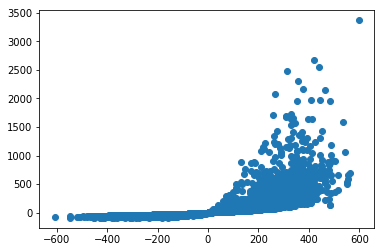

In [29]:
plt.scatter(gal_bought_used_df.FuelDifference, gal_bought_used_df.FuelDifferencePct)
plt.show()

In [108]:
test_df = gal_bought_used_df.groupby(['DriverID'])['FuelDifference'].sum().to_frame()
test_df.sort_values('FuelDifference', ascending=False)

,FuelDifference
DriverID,
GANJ,2931.43
BYRCHR,2927.13
MARMIS,2754.65
DAVJO,2359.65
BARCR,2074.43
BOUB,2038.63
TAYCHA,1841.75
HALJA,1821.13
BURST,1805.10


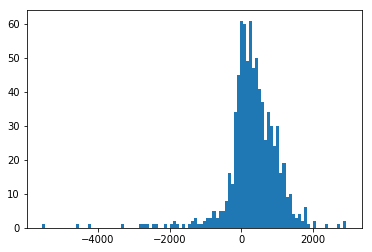

In [109]:
plt.hist(test_df.FuelDifference, bins=100)
plt.show()

##### I know that someone has stolen fuel if they have significantly less fuel in the tank than what I expect when I check it.
##### I know how much fuel is actually in the tank if I look at the fuel level for the TimeStamp that matches when they do the weekly extract.
##### I know how much fuel is supposed to be in the tank if I take the diference in what was bought and what was used for a given timeframe.

In [95]:
merged_events_levels_df[(merged_events_levels_df['DriverID'] == 'ANDANT') & (merged_events_levels_df.EventTimeStamp >= '2017-04-10 16:31:19.090')].sort_values('EventTimeStamp')

,EventTimeStamp,EquipmentID,DriverID,Latitude,Longitude,Speed,Odometer,IgnitionStatus,EFReportReason,TankLevelPercent,TankLevelGallons
1866549,2017-04-10 16:31:19.090,1628,ANDANT,34.45618,-80.26392,0,474103.7,0,1,48.5,121.25
1874833,2017-04-11 06:26:41.310,1628,ANDANT,34.45532,-80.26391,0,474103.8,0,1,93.2,186.40
1874835,2017-04-11 06:27:01.453,1628,ANDANT,34.45533,-80.26392,0,474103.8,0,0,40.9,81.80
1874878,2017-04-11 06:55:51.327,1628,ANDANT,34.45520,-80.26398,0,474103.9,0,1,64.1,128.20
1874879,2017-04-11 06:56:01.327,1628,ANDANT,34.45520,-80.26398,0,474103.9,0,0,60.5,121.00
1874880,2017-04-11 06:58:01.327,1628,ANDANT,34.45515,-80.26402,0,474103.9,0,0,60.1,120.20
1874881,2017-04-11 06:59:41.327,1628,ANDANT,34.45518,-80.26398,0,474103.9,0,1,60.1,120.20
1877397,2017-04-11 08:01:01.670,1628,ANDANT,34.45517,-80.26398,0,474103.9,0,0,93.8,187.60
1877399,2017-04-11 08:04:21.703,1628,ANDANT,34.45530,-80.26345,0,474103.9,0,1,85.5,196.65
1877400,2017-04-11 08:04:41.703,1628,ANDANT,34.45531,-80.26343,0,474103.9,0,0,75.4,150.80


In [75]:
weekly_perf_df[(weekly_perf_df.DriverID == 'ANDANT') & (weekly_perf_df.EventTimeStamp >= '2017-03-28')].sort_values('EventTimeStamp')

,ESS_Id,EventTimeStamp,EquipmentID,DriverID,Latitude,Longitude,TripStatus,DataStartTimeStamp,DataEndTimeStamp,Distance,DriveTime,EngineTime,MoveTime,IntertripIdleTime,ShortIdleTime,TotalFuelUsed,IdleFuelUsed,SpeedMatrix,Month,Week
7826,15349112,2017-03-28 04:15:29.000,1628,ANDANT,37.839398,-88.944212,I,2017-03-21 04:11:00,2017-03-28 04:15:00,2399.0,2718.0,2748.0,2601.0,12.0,12.0,352.6,0.8,"34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",3,13
8093,15489358,2017-04-04 04:13:25.000,1628,ANDANT,36.066018,-86.432638,O,2017-03-28 04:15:00,2017-04-04 04:13:00,1609.0,2130.0,2154.0,1994.0,0.0,0.0,236.8,2.3,"25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",4,14
9239,15630649,2017-04-11 05:37:17.000,1628,ANDANT,34.456203,-80.263888,O,2017-04-04 04:13:00,2017-04-11 05:37:00,2765.0,3072.0,3092.0,2989.0,0.0,0.0,412.0,1.3,"63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",4,15
9807,15764866,2017-04-18 04:46:42.000,1628,ANDANT,30.117129,-93.819351,O,2017-04-11 05:37:00,2017-04-18 04:46:00,2488.0,2736.0,2760.0,2636.0,0.0,0.0,373.3,2.5,"22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",4,16


In [105]:
fuel_transacts_df[(fuel_transacts_df.TRNDRI == 'ANDANT') & (fuel_transacts_df.TRNDAT >= '2017-02-28')]

,TRNDAT,TRNTIM,TRNDRI,TRNUNT,TRNPI1,TRNPQ1,Month,Week
20507,2017-03-01,1239,ANDANT,1628,ULSD,161.54,3,9
21332,2017-03-03,1505,ANDANT,1628,ULSD,178.53,3,9
22298,2017-03-07,808,ANDANT,1628,ULSD,137.76,3,10
23184,2017-03-09,906,ANDANT,1628,ULSD,130.09,3,10
24304,2017-03-13,310,ANDANT,1628,ULSD,171.67,3,11
25258,2017-03-15,1355,ANDANT,1628,ULSD,175.44,3,11
25727,2017-03-16,1618,ANDANT,1628,ULSD,132.36,3,11
26728,2017-03-20,1222,ANDANT,1628,ULSD,177.41,3,12
27881,2017-03-23,737,ANDANT,1628,ULSD,166.35,3,12
29163,2017-03-27,1222,ANDANT,1628,ULSD,183.53,3,13


#### COME BACK TO THIS THOUGHT: If someone is buying fuel too frequently, they are probably stealing...
Why would this guy be buying 156.7 gallons one day on 4/6 and 125.06 gallons on 4/7??? Could he possibly have used that much fuel in a day?
##### ANSWER: Yes, yes he could

In [111]:
weekly_perf_df[weekly_perf_df.DriverID == 'RAMRI']

,ESS_Id,EventTimeStamp,EquipmentID,DriverID,Latitude,Longitude,TripStatus,DataStartTimeStamp,DataEndTimeStamp,Distance,DriveTime,EngineTime,MoveTime,IntertripIdleTime,ShortIdleTime,TotalFuelUsed,IdleFuelUsed,SpeedMatrix,Month,Week
55,13659674,2017-01-03 04:24:28.000,1567,RAMRI,40.709074,-74.184490,O,2016-12-27 04:24:00,2017-01-03 04:24:00,2350.0,2743.0,4493.0,2573.0,1735.0,86.0,379.2,25.3,"14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",1,1
780,13803696,2017-01-10 04:27:52.000,1567,RAMRI,36.935509,-80.995462,O,2017-01-03 04:24:00,2017-01-10 04:27:00,2081.0,2438.0,4403.0,2312.0,1948.0,38.0,340.2,29.8,"13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",1,2
1383,13942277,2017-01-17 04:19:10.000,1567,RAMRI,41.096898,-81.500138,I,2017-01-10 04:27:00,2017-01-17 04:19:00,2073.0,2528.0,3601.0,2403.0,1040.0,36.0,375.8,26.6,"50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",1,3
1983,14082947,2017-01-24 04:18:35.000,1567,RAMRI,39.533888,-77.605879,I,2017-01-17 04:19:00,2017-01-24 04:18:00,2464.0,2906.0,2968.0,2787.0,27.0,5.0,407.1,5.5,"43,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",1,4
2628,14218857,2017-01-31 04:13:45.000,1567,RAMRI,37.930416,-79.225370,O,2017-01-24 04:18:00,2017-01-31 04:13:00,2569.0,2852.0,6171.0,2701.0,3319.0,17.0,437.3,50.7,"12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",1,5
3511,14357587,2017-02-07 04:16:08.000,1567,RAMRI,42.344537,-79.566666,I,2017-01-31 04:13:00,2017-02-07 04:16:00,2334.0,2586.0,4947.0,2507.0,2358.0,20.0,366.8,38.0,"13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",2,6
4181,14500290,2017-02-14 04:38:00.000,1567,RAMRI,36.560138,-82.212453,O,2017-02-07 04:16:00,2017-02-14 04:37:00,2304.0,2584.0,2877.0,2465.0,270.0,57.0,362.0,10.0,"11,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",2,7
4479,14642353,2017-02-21 04:07:28.000,1567,RAMRI,38.286620,-77.509351,I,2017-02-14 04:37:00,2017-02-21 04:07:00,2560.0,2969.0,3526.0,2818.0,536.0,43.0,406.3,13.2,"47,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",2,8
5026,14784064,2017-02-28 04:20:30.000,1567,RAMRI,36.773564,-84.169999,I,2017-02-21 04:07:00,2017-02-28 04:20:00,2607.0,2780.0,2808.0,2719.0,0.0,0.0,378.5,2.5,"34,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",2,9
6011,14924131,2017-03-07 04:22:05.000,1591,RAMRI,35.231435,-82.202129,I,2017-03-03 10:42:00,2017-03-07 04:22:00,644.0,759.0,771.0,730.0,0.0,0.0,123.3,1.5,"49,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0...",3,10
